(labs:cor72)=
# Harris detector

The objective of this exercise is to detect corners using the Harris detector.

In [9]:
from skimage.io import imread
from skimage.feature import corner_harris, corner_peaks

from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis, colorbar, clim

In [10]:
x = imread("L.png")
x = x# / 255

The Harris detector can detect corners of an image, based on differences in intensity.

With the function `corner_harris`, choose `method='k'` and a value of $k$ between 0 and 0.2.
This results in a new image, of the same size as the original image,
whose intensities are proportional to the presence of a corner.

In the images below, the intensities are restricted to the interval $[-0.4, 0.4]$ in order to highlight the values of the image.

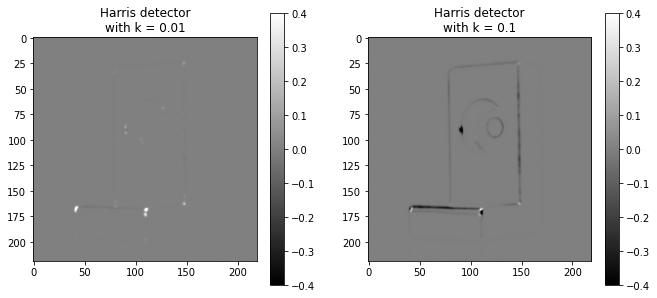

In [11]:
ks = [.01, .10]
figure(figsize=(17,5))
for i, k in enumerate(ks):
    
    y = corner_harris(x, method='k', k=k, sigma=1)
    
    subplot(1,3,i+1)
    imshow(y, cmap="gray")
    clim(-0.4, 0.4)
    colorbar()
    title(f"Harris detector\nwith k = {k}")

The function `corner_peaks` returns the coordinates of the strong values of the image, which correspond to the corners.
These coordinates are returned in the form of a matrix, the first column corresponds to the ordinates, the second to the abscissas.

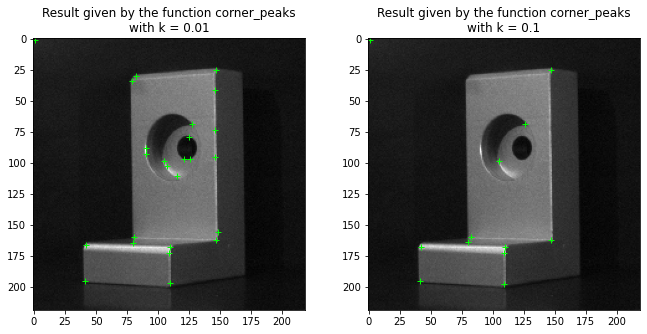

In [12]:
ks = [.01, .10]
figure(figsize=(17,5))
for i, k in enumerate(ks):
    
    y = corner_harris(x, method='k', k=k, sigma=1)
    coords = corner_peaks(y, threshold_rel=.01)
    
    subplot(1,3,i+1)
    imshow(x, cmap="gray")
    plot(coords[:,1], coords[:,0], color='lime', marker='+', linestyle='none')
    title(f"Result given by the function corner_peaks\nwith k = {k}")

The images above correspond to the result obtained for two values of $k$ (and `threshold_rel=0.01`).
When $k$ is large, only the sharpest corners are detected: one can see this in the image on the right.

However, not all corners of are detected: how to improve the result?

In addition, some points do not correspond to corners.
They correspond actually to pixels with very different intensity from their neighbors,
which is the definition of a corner for Harris.